In [440]:
#!pip install xgboost

In [441]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [442]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('result.csv',low_memory=False)
result = []
df

,Unnamed: 0,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,SOUNDEX,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_DISTRIT,ID_BAIRRO,NM_BAIRRO,ID_LOGRADO,ID_GEO1,ID_GEO2,NM_REFEREN,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,HOSPITAL,DDD_HOSP,TEL_HOSP,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CODISINF,CO_BAINF,NOBAIINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,DS_OBS,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,6,501,2,A90,2016-03-07,201610,2016,29,291560,1388.0,2414155.0,2016-03-05,201609,NaN,4055.0,F,5.0,4.0,1.0,29.0,291560,1388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2016-03-07,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2016-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,336,507898,2,A90,2016-01-19,201603,2016,29,292740,1380.0,3808.0,2015-01-15,201502,NaN,4029.0,F,2.0,9.0,9.0,29.0,292740,1380.0,50.0,150.0,PIATA,NaN,NaN,NaN,NaN,1.0,1.0,2016-01-19,111220.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,9.0,NaN,1.0,NaN,2016-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PACIENTE GESTANTE 19 SEMANAS, APRESENTA CEFALÉ...",2.0,NaN,2016-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
2,444,122892,2,A90,2016-01-13,201602,2016,29,293330,1398.0,2402076.0,2016-01-05,201601,NaN,4023.0,I,6.0,NaN,9.0,29.0,293330,1398.0,NaN,297.0,LAGOA FORMOSA,NaN,NaN,NaN,NaN,2.0,1.0,2016-01-13,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.0,1.0,293330.0,NaN,NaN,NaN,10.0,2.0,NaN,NaN,9.0,NaN,2016-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PACIENTE APRESENTOU PURIDO,FEBRE,MIALGIA",2.0,NaN,2016-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
3,622,100258,2,A90,2016-01-06,201601,2016,29,291360,1385.0,2415844.0,2016-01-05,201601,NaN,4040.0,M,6.0,9.0,NaN,29.0,291360,1385.0,NaN,10.0,ESPERANCA,NaN,NaN,NaN,VENDA DE VAL,1.0,1.0,2016-01-06,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [443]:
df[df['CS_RACA']== 9]['CS_RACA'].describe()

count    64233.0
mean         9.0
std          0.0
min          9.0
25%          9.0
50%          9.0
75%          9.0
max          9.0
Name: CS_RACA, dtype: float64

In [444]:
campos = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA',
    'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
    'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE','CLASSI_FIN'
]
df = df[campos]
df = df[df['CLASSI_FIN'].isin([5, 10, 11, 12])]
df.loc[df['CLASSI_FIN'] != 5,'CLASSI_FIN'] = 1
df.loc[df['CLASSI_FIN'] == 5,'CLASSI_FIN'] = 0

In [445]:
df.isna().any()

FEBRE         False
MIALGIA       False
CEFALEIA      False
EXANTEMA      False
VOMITO        False
NAUSEA        False
DOR_COSTAS    False
CONJUNTVIT    False
ARTRITE       False
ARTRALGIA     False
PETEQUIA_N    False
LEUCOPENIA    False
LACO          False
DOR_RETRO     False
DIABETES      False
HEMATOLOG     False
HEPATOPAT     False
RENAL         False
HIPERTENSA    False
ACIDO_PEPT    False
AUTO_IMUNE    False
CLASSI_FIN    False
dtype: bool

In [446]:
df.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,CLASSI_FIN
count,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.00000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000,118877.000000
mean,1.148994,1.254801,1.242149,1.820302,1.767440,1.686861,1.74980,1.963778,1.910714,1.767701,1.909570,1.971391,1.982343,1.729939,1.977986,1.994313,1.994213,1.995752,1.939408,1.993405,1.995643,0.660506
std,0.356084,0.435751,0.428386,0.383938,0.422466,0.463772,0.43313,0.186844,0.285157,0.422300,0.286797,0.166707,0.131702,0.443993,0.146731,0.075195,0.075855,0.065039,0.238581,0.080942,0.065867,0.473539
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [447]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(columns=['CLASSI_FIN'])
y = df['CLASSI_FIN']

rus = RandomUnderSampler()
X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, stratify=y_train, test_size=0.25, random_state=42)

In [448]:
xgb = XGBClassifier(objective='binary:logistic', seed=42)
xgb.fit(X_train,
        y_train,
        verbose=True,
        eval_metric='aucpr',
        eval_set=[(X_val, y_val)])

[0]	validation_0-aucpr:0.62226
[1]	validation_0-aucpr:0.62951
[2]	validation_0-aucpr:0.63083
[3]	validation_0-aucpr:0.63361
[4]	validation_0-aucpr:0.63458
[5]	validation_0-aucpr:0.63453
[6]	validation_0-aucpr:0.63602
[7]	validation_0-aucpr:0.63650
[8]	validation_0-aucpr:0.63760
[9]	validation_0-aucpr:0.63782
[10]	validation_0-aucpr:0.63817
[11]	validation_0-aucpr:0.63810
[12]	validation_0-aucpr:0.63781
[13]	validation_0-aucpr:0.63759
[14]	validation_0-aucpr:0.63789
[15]	validation_0-aucpr:0.63816
[16]	validation_0-aucpr:0.63797
[17]	validation_0-aucpr:0.63795
[18]	validation_0-aucpr:0.63798
[19]	validation_0-aucpr:0.63803
[20]	validation_0-aucpr:0.63745
[21]	validation_0-aucpr:0.63708
[22]	validation_0-aucpr:0.63699
[23]	validation_0-aucpr:0.63712
[24]	validation_0-aucpr:0.63744
[25]	validation_0-aucpr:0.63709
[26]	validation_0-aucpr:0.63659
[27]	validation_0-aucpr:0.63621
[28]	validation_0-aucpr:0.63592
[29]	validation_0-aucpr:0.63576
[30]	validation_0-aucpr:0.63548
[31]	validation_0-

c:\Users\Matheus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-aucpr:0.63385
[40]	validation_0-aucpr:0.63383
[41]	validation_0-aucpr:0.63393
[42]	validation_0-aucpr:0.63390
[43]	validation_0-aucpr:0.63393
[44]	validation_0-aucpr:0.63346
[45]	validation_0-aucpr:0.63291
[46]	validation_0-aucpr:0.63306
[47]	validation_0-aucpr:0.63280
[48]	validation_0-aucpr:0.63298
[49]	validation_0-aucpr:0.63293
[50]	validation_0-aucpr:0.63282
[51]	validation_0-aucpr:0.63280
[52]	validation_0-aucpr:0.63270
[53]	validation_0-aucpr:0.63301
[54]	validation_0-aucpr:0.63276
[55]	validation_0-aucpr:0.63270
[56]	validation_0-aucpr:0.63290
[57]	validation_0-aucpr:0.63324
[58]	validation_0-aucpr:0.63295
[59]	validation_0-aucpr:0.63290
[60]	validation_0-aucpr:0.63272
[61]	validation_0-aucpr:0.63278
[62]	validation_0-aucpr:0.63255
[63]	validation_0-aucpr:0.63229
[64]	validation_0-aucpr:0.63228
[65]	validation_0-aucpr:0.63201
[66]	validation_0-aucpr:0.63197
[67]	validation_0-aucpr:0.63210
[68]	validation_0-aucpr:0.63187
[69]	validation_0-aucpr:0.63170
[70]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [449]:
y_pred = xgb.predict(X_test)

result.append(['XGBoost', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

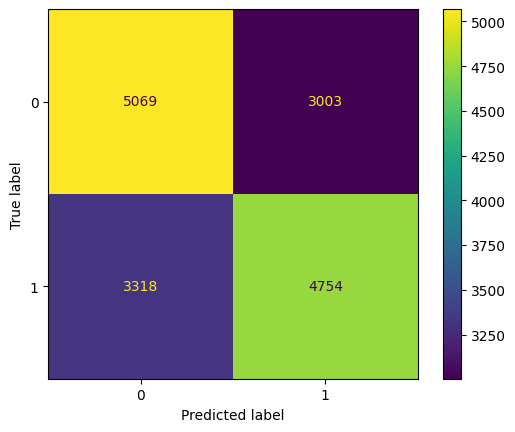

In [450]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [451]:
precision_score(y_test, y_pred)

0.6128657986334923

In [452]:
recall_score(y_test, y_pred)

0.5889494549058474

In [453]:
f1_score(y_test, y_pred)

0.6006696569587466

In [454]:
model_path = 'xgb.txt'
with open(model_path, 'wb') as file:
    pickle.dump(xgb, file)

X_test_path = 'X_test.txt'
with open(X_test_path, 'wb') as file:
    pickle.dump(X_test, file)

y_test_path = 'y_test.txt'
with open(y_test_path, 'wb') as file:
    pickle.dump(y_test, file)

In [455]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
result.append(['K-Nearest Neighbors', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

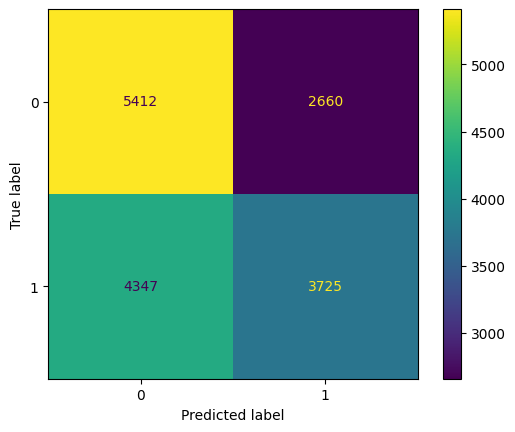

In [456]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [457]:
precision_score(y_test, y_pred)

0.5833985904463587

In [458]:
recall_score(y_test, y_pred)

0.4614717542120912

In [459]:
f1_score(y_test, y_pred)

0.5153212976412811

In [460]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

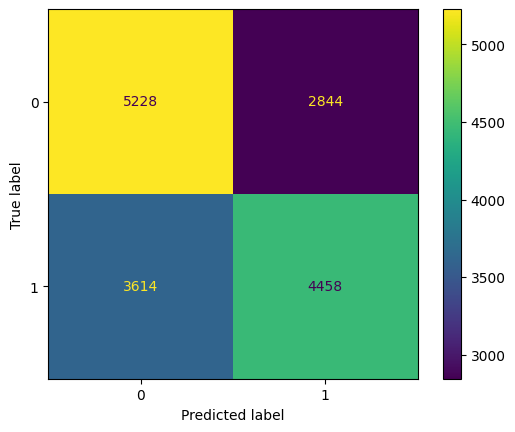

In [461]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [462]:
precision_score(y_test, y_pred)

0.610517666392769

In [463]:
recall_score(y_test, y_pred)

0.5522794846382557

In [464]:
f1_score(y_test, y_pred)

0.5799401587095095

In [465]:
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid')]
    )

optimizer = Adam(0.001)
nn.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

nn.fit(X_train, y_train, epochs=200, validation_data=(X_val,y_val), batch_size=32)

y_pred = nn.predict(X_test)
y_classes = ((y_pred > 0.5)+0).ravel()

result.append(['Neural Network', precision_score(y_test, y_classes).round(2), recall_score(y_test, y_classes).round(2), f1_score(y_test, y_classes).round(2)])


Epoch 1/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 2s 687us/step - accuracy: 0.5703 - loss: 0.6747 - val_accuracy: 0.5711 - val_loss: 0.6708
Epoch 2/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.5941 - loss: 0.6629 - val_accuracy: 0.5965 - val_loss: 0.6563
Epoch 3/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.5968 - loss: 0.6638 - val_accuracy: 0.6021 - val_loss: 0.6574
Epoch 4/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.5915 - loss: 0.6637 - val_accuracy: 0.6045 - val_loss: 0.6557
Epoch 5/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.5971 - loss: 0.6618 - val_accuracy: 0.6047 - val_loss: 0.6560
Epoch 6/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.5968 - loss: 0.6608 - val_accuracy: 0.6008 - val_loss: 0.6623
Epoch 7/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.5984 - loss: 0.6584 - val_accuracy: 0.5968 - val_loss: 0.6569
Epoch 8/200
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 

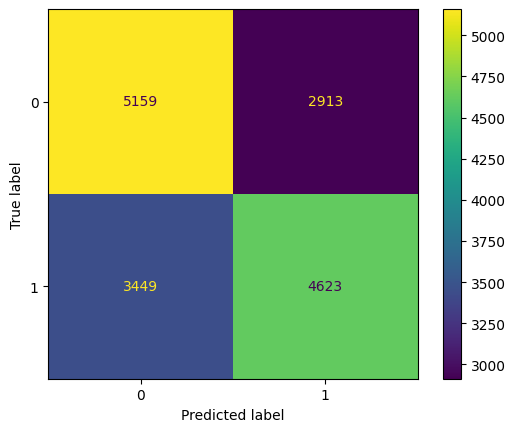

In [466]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [467]:
precision_score(y_test, y_classes)

0.6134554140127388

In [468]:
recall_score(y_test, y_classes)

0.5727205153617443

In [469]:
f1_score(y_test, y_classes)

0.5923885187083547

In [470]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',penalty='l2',max_iter=100)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
result.append(['Logistic Regression', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

c:\Users\Matheus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


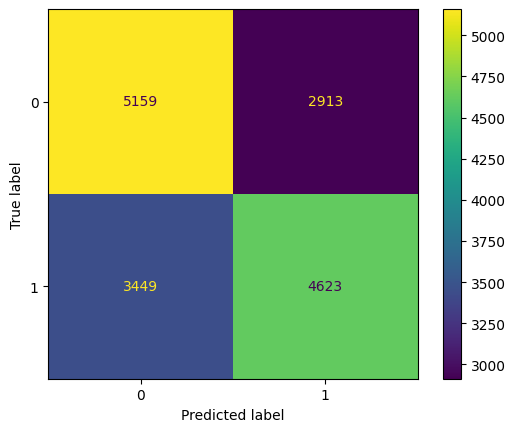

In [471]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [472]:
precision_score(y_test,y_pred)

0.6222500696184907

In [473]:
precision_score(y_test,y_pred)

0.6222500696184907

In [474]:
precision_score(y_test,y_pred)

0.6222500696184907

In [475]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
result.append(['Random Forest', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

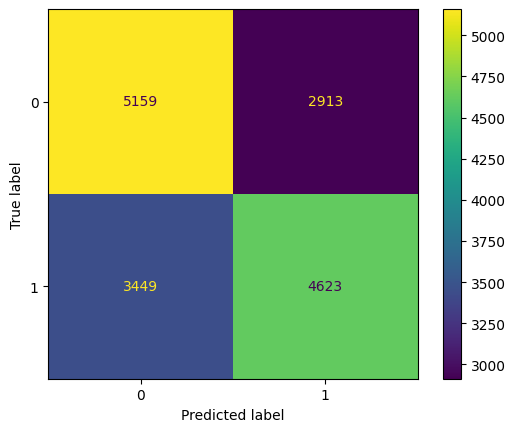

In [476]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [477]:
precision_score(y_test,y_pred)

0.6096824980320126

In [478]:
recall_score(y_test,y_pred)

0.5756937561942518

In [479]:
f1_score(y_test,y_pred)

0.5922008410857652

In [480]:
classificators = pd.DataFrame(result, columns=['Classificator', 'Precision', 'Recall', 'F1'])
classificators.to_csv('classificators.csv',index=False)

In [481]:
classificators

,Classificator,Precision,Recall,F1
0,XGBoost,0.61,0.59,0.60
1,K-Nearest Neighbors,0.58,0.46,0.52
2,Neural Network,0.61,0.57,0.59
3,Logistic Regression,0.62,0.55,0.59
4,Random Forest,0.61,0.58,0.59
